<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg6/K_Means_Clustering_Using_Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h5>Nama : Tassya Ramadhanti</h5>
<h5>NIM  : 1103204016</h5>
<h5>K-Means Clustering Using Mall Customer Segmentation Data</h5>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"3182cbc2ed662c2e7a9035299a970b54"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets list -s "Mall Customer Segmentation Data"

ref                                                    title                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ----------------------------------  ----  -------------------  -------------  ---------  ---------------  
vjchoudhary7/customer-segmentation-tutorial-in-python  Mall Customer Segmentation Data      2KB  2018-08-11 07:23:02         141983       1532  0.88235295       
joebeachcapital/customer-segmentation                  Customer Segmentation                2KB  2023-08-15 00:17:34            767         28  1.0              
dev0914sharma/customer-clustering                      Customer Clustering                 26KB  2021-05-07 12:17:03          10154         96  0.7647059        
krishnaraj30/mall-visiting-customer-data               Mall Visiting Customer Data          2KB  2023-06-14 04:49:55            907         30  1.0              
nelakurthisudheer/mall-custo

In [5]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python --unzip

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.66MB/s]


In [7]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama file dataset yang ingin Anda baca
nama_file = 'Mall_Customers.csv'

# Membaca dataset dari file CSV dan mengubahnya menjadi DataFrame
df = pd.read_csv(nama_file)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Mengganti nama atribut/kolom dalam DataFrame
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Menampilkan DataFrame setelah mengubah nama atribut/kolom
print(df.head())


   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [9]:
# Menghapus kolom "CustomerID" dan "Gender" dari DataFrame
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Menampilkan DataFrame setelah menghapus kolom
print(df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

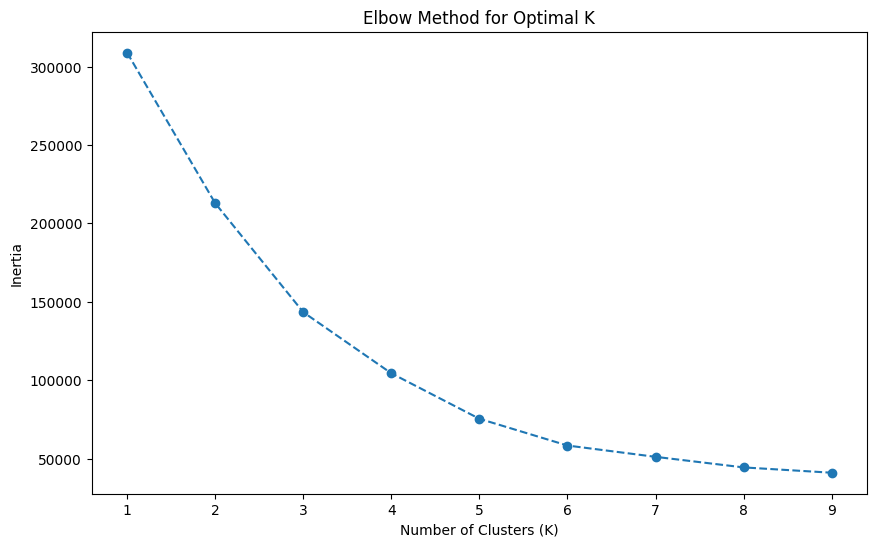

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil nilai yang akan digunakan untuk clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

# Menentukan jumlah cluster yang diinginkan (misalnya, max_k = 10)
max_k = 10

# Inisialisasi list untuk inertia values
inertia_values = []

# Menghitung inertia untuk setiap nilai K
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Menampilkan grafik Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


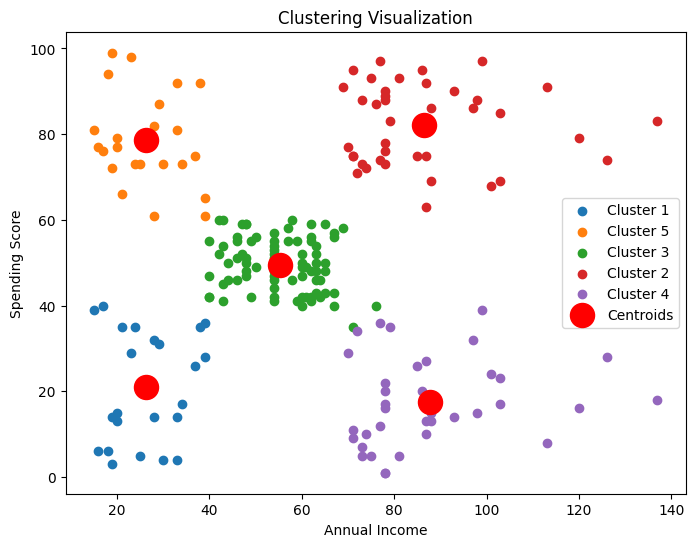

In [15]:
# Menentukan jumlah cluster yang diinginkan (berdasarkan hasil Elbow Method)
optimal_k = 5  # Misalnya, jumlah cluster optimal yang telah dipilih

# Melakukan clustering dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi klaster
plt.figure(figsize=(8, 6))
for i in df['Cluster'].unique():  # Menggunakan kurung siku [ ] untuk akses kolom 'Cluster'
    plt.scatter(df[df['Cluster'] == i]['Annual Income'],
                df[df['Cluster'] == i]['Spending Score'],
                label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],  # Menggunakan indeks 0 dan 1
            s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


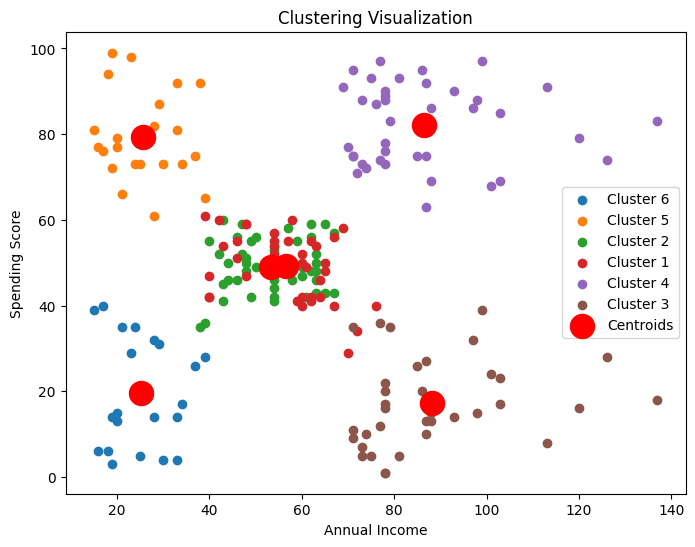

In [16]:
# Menentukan jumlah cluster yang diinginkan (berdasarkan hasil Elbow Method)
optimal_k = 6  # Misalnya, jumlah cluster optimal yang telah dipilih

# Melakukan clustering dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi klaster
plt.figure(figsize=(8, 6))
for i in df['Cluster'].unique():  # Menggunakan kurung siku [ ] untuk akses kolom 'Cluster'
    plt.scatter(df[df['Cluster'] == i]['Annual Income'],
                df[df['Cluster'] == i]['Spending Score'],
                label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],  # Menggunakan indeks 0 dan 1
            s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

# Inisialisasi dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Menghitung Silhouette Score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)  # Perhatikan bahwa kami mengimpor silhouette_score
    silhouette_scores[k] = silhouette_avg

# Menampilkan nilai Silhouette Score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
from sklearn.metrics import davies_bouldin_score

# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)  # Menghitung Davies-Bouldin Index
    dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571023143309133
Davies-Bouldin Index for k=3: 0.8748062648492879
Davies-Bouldin Index for k=4: 0.8914904209843165
Davies-Bouldin Index for k=5: 0.8218781633199781
Davies-Bouldin Index for k=6: 0.746974007275528
Davies-Bouldin Index for k=7: 0.7863764854525301
Davies-Bouldin Index for k=8: 0.8641438876447516
Davies-Bouldin Index for k=9: 0.9070119449899816
Davies-Bouldin Index for k=10: 0.9573604236246045


In [20]:
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    ch_score = calinski_harabasz_score(X, labels)  # Menghitung Calinski-Harabasz Index
    calinski_harabasz_scores[k] = ch_score

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, ch_score in calinski_harabasz_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {ch_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.28096999467428
Calinski-Harabasz Index for k=3: 113.70507138642179
Calinski-Harabasz Index for k=4: 127.9838294818919
Calinski-Harabasz Index for k=5: 151.04386000160667
Calinski-Harabasz Index for k=6: 166.7204931788687
Calinski-Harabasz Index for k=7: 162.2852042279988
Calinski-Harabasz Index for k=8: 163.58062876554533
Calinski-Harabasz Index for k=9: 156.15508760692356
Calinski-Harabasz Index for k=10: 152.26426170758603
